In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [3]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 960.0 kB/s eta 0:00:12
    --------------------------------------- 0.2/10.6 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.3/10.6 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.6 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/10.6 MB 3.2 MB/s eta 0:00:03
   ----- -----

In [4]:
from sklearn.datasets import make_blobs

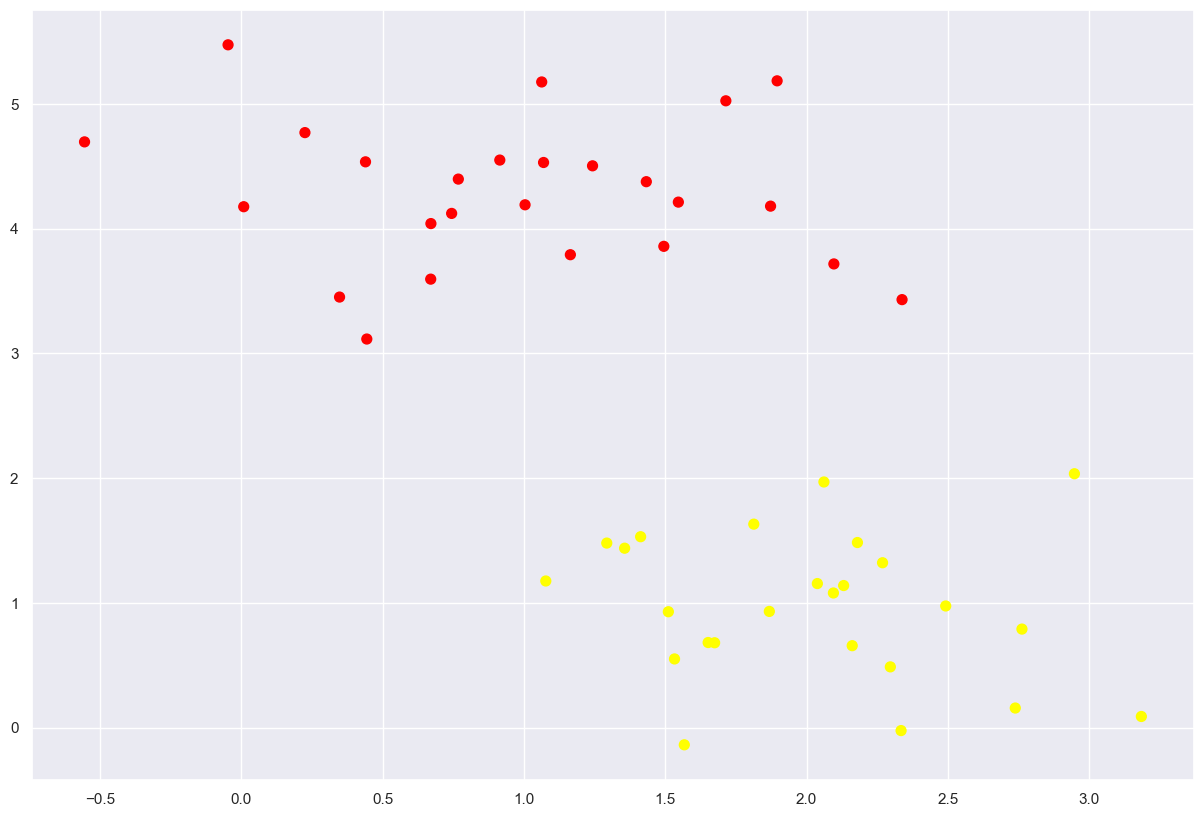

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

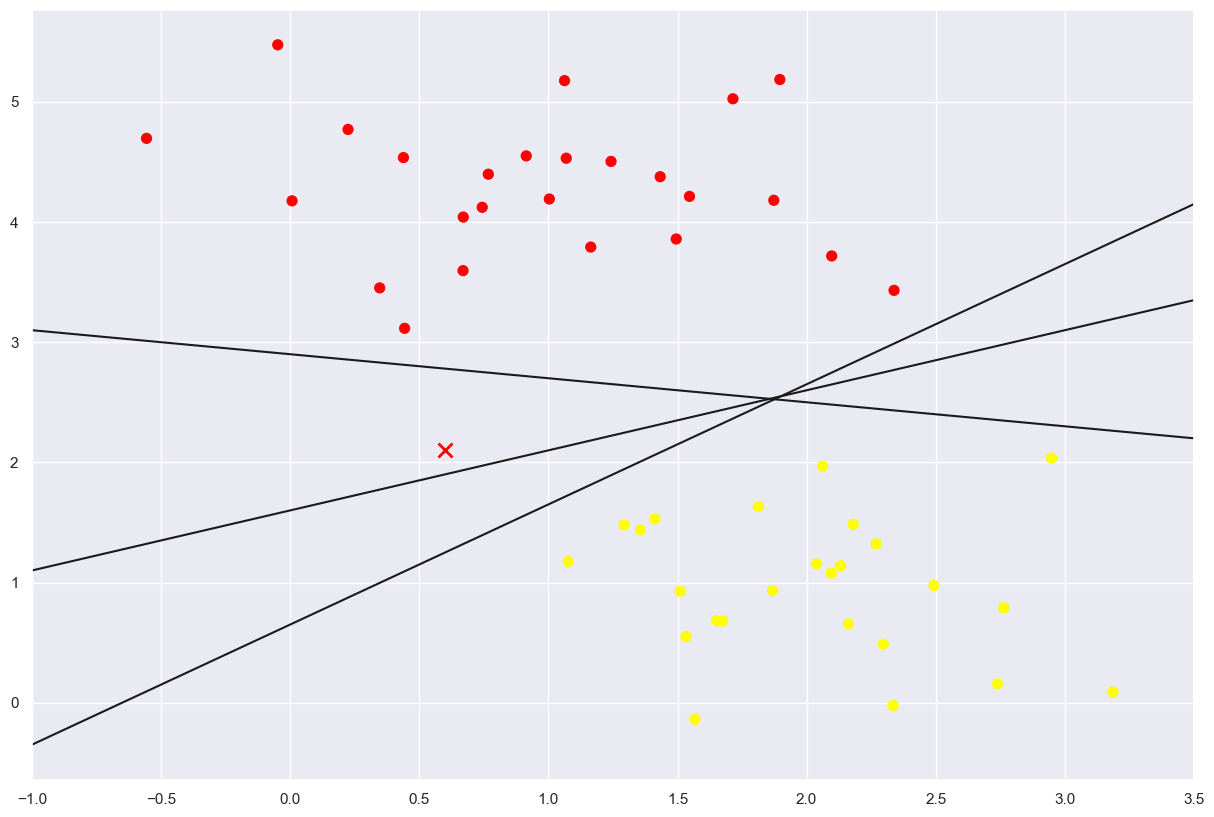

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

# Support Vector Machines: Maximizing the Margin

(-1.0, 3.5)

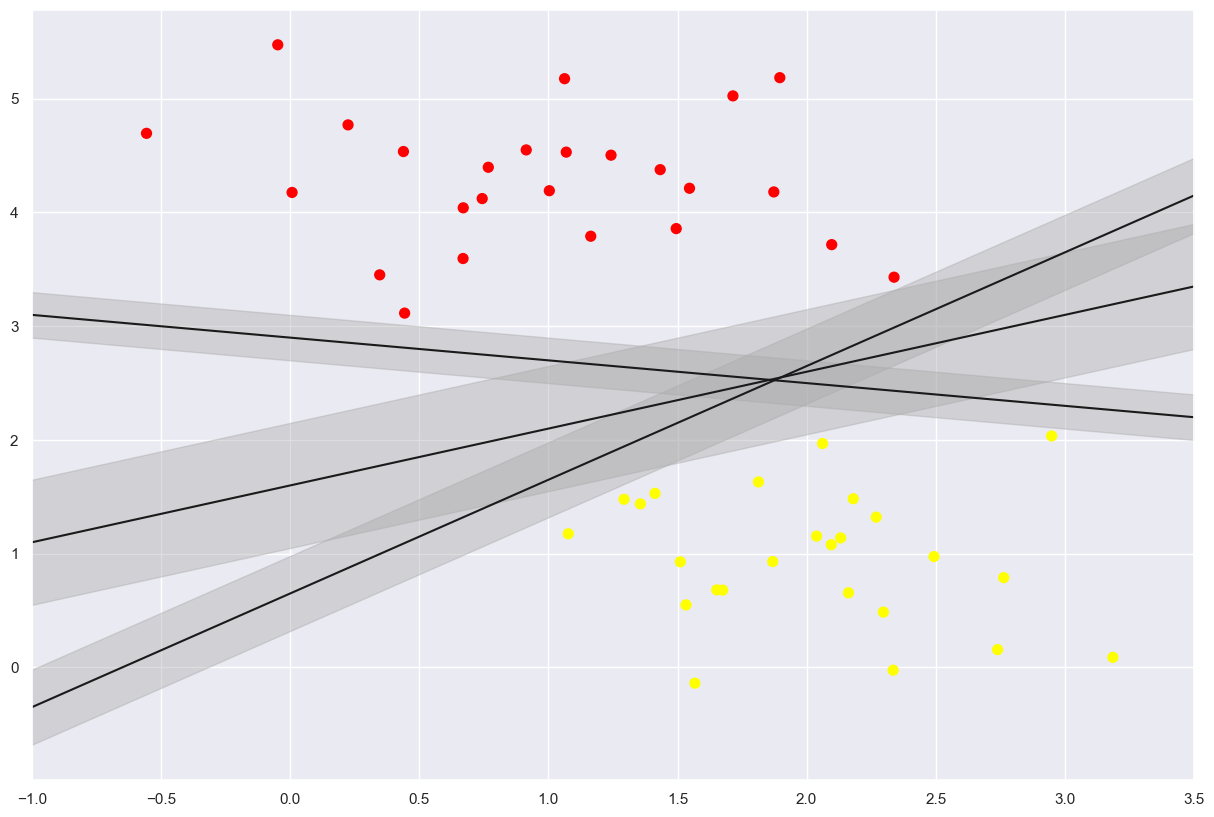

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [8]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

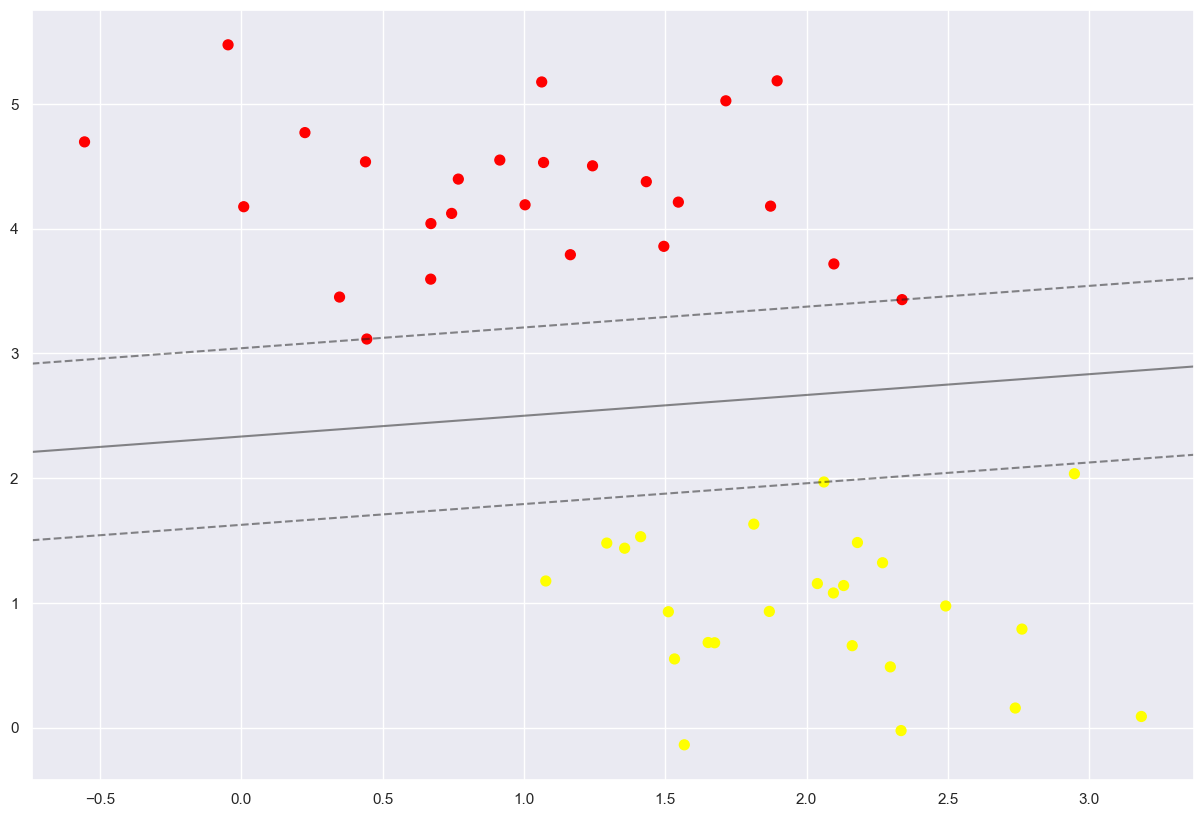

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [11]:
model.support_vectors_


array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

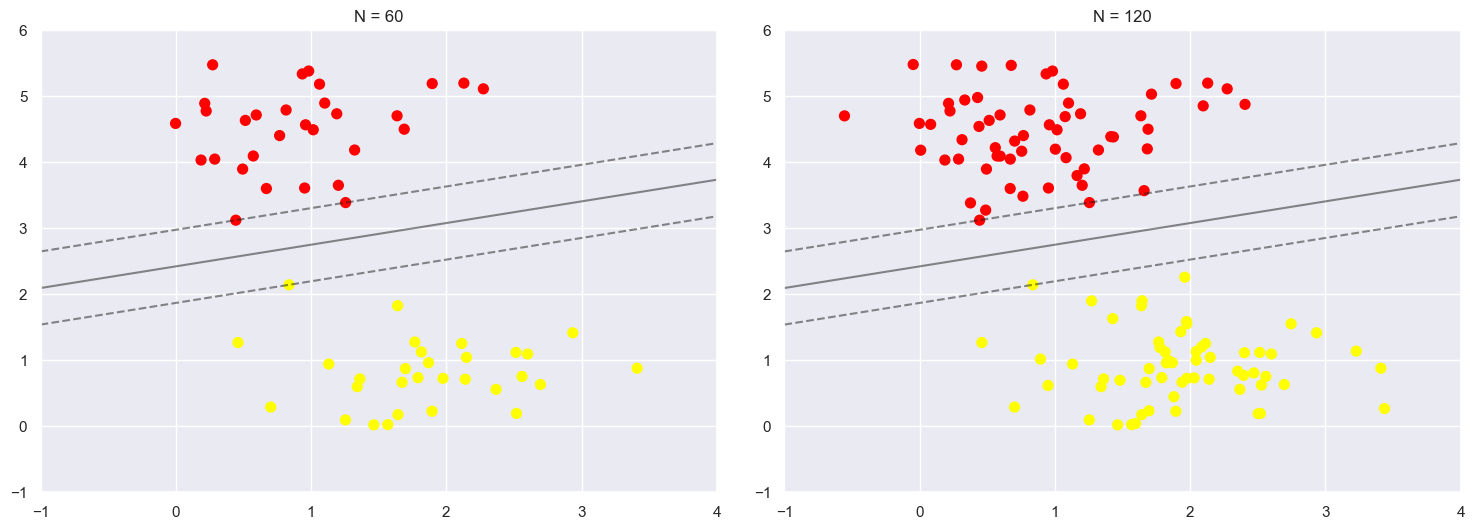

In [12]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50,marker='o', cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [13]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

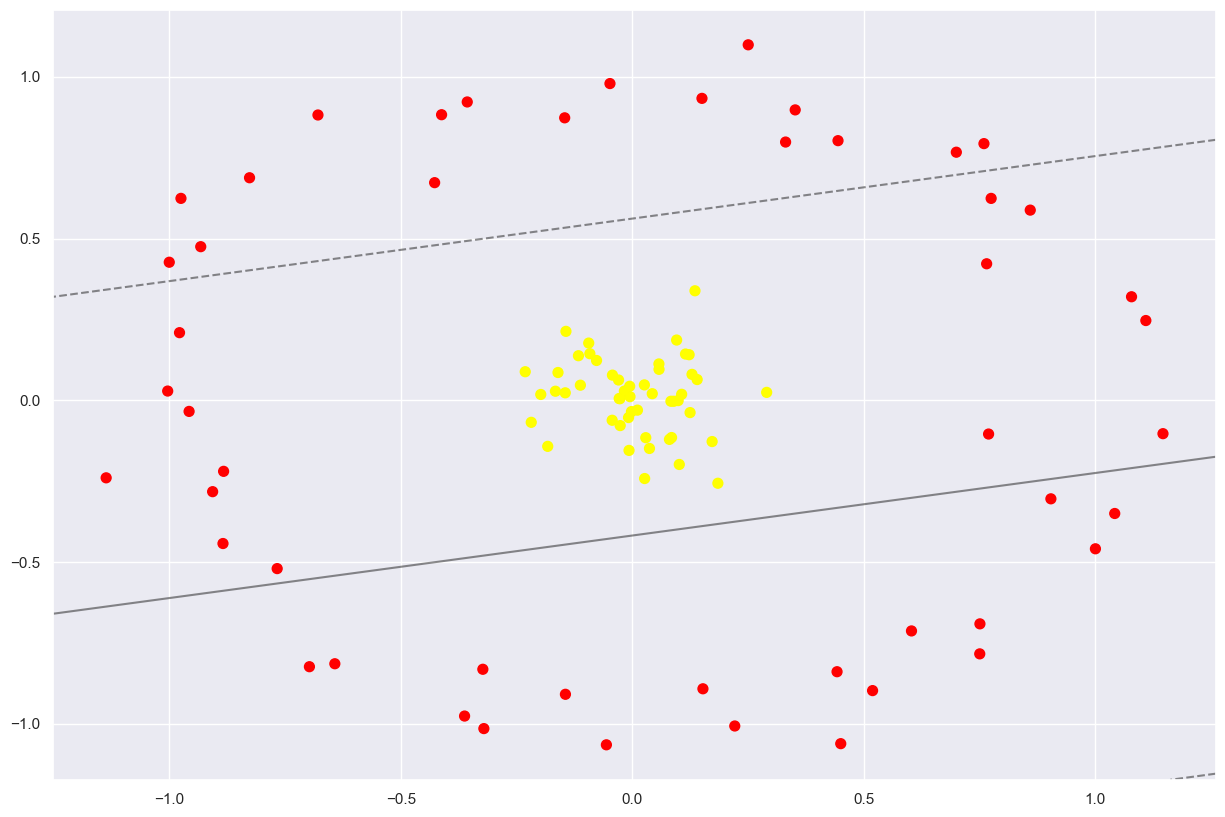

In [14]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [15]:
X

array([[ 9.57603454e-02,  1.86219148e-01],
       [ 8.48139715e-02, -1.15163208e-01],
       [-8.82843466e-01, -2.19617472e-01],
       [ 1.72418555e-01, -1.27555653e-01],
       [-2.18305851e-01, -6.81120342e-02],
       [ 8.34669357e-02, -2.98712495e-03],
       [-1.12138617e-01,  4.66491296e-02],
       [ 2.90795450e-02, -1.15616617e-01],
       [ 7.65420282e-01,  4.21970468e-01],
       [ 1.40078427e-01,  6.41288202e-02],
       [-3.56558548e-01,  9.22157287e-01],
       [ 8.95688642e-02, -3.02477129e-03],
       [-6.97473209e-01, -8.23511664e-01],
       [ 1.22728555e-01,  1.40872731e-01],
       [-8.26820612e-01,  6.87881486e-01],
       [-9.06562933e-01, -2.82471987e-01],
       [ 1.04210877e+00, -3.49930897e-01],
       [ 8.59608188e-01,  5.87827932e-01],
       [-9.32225443e-01,  4.74808816e-01],
       [-4.34758376e-02, -6.17327494e-02],
       [-1.60519743e-01,  8.58702717e-02],
       [-6.79030135e-01,  8.81874091e-01],
       [-1.00024810e+00,  4.26747930e-01],
       [ 5.

In [16]:
1.06909564e-01**2 +  1.09777740e+00**2

1.2165448748254302

In [17]:
(X ** 2).sum(1)

array([4.38476148e-02, 2.04559742e-02, 8.27644419e-01, 4.59986026e-02,
       5.22966937e-02, 6.97565227e-03, 1.47512106e-02, 1.42128221e-02,
       7.63927284e-01, 2.37344712e-02, 9.77508061e-01, 8.03173067e-03,
       1.16464034e+00, 3.49074245e-02, 1.15681326e+00, 9.01646774e-01,
       1.20844233e+00, 1.08446792e+00, 1.09448769e+00, 5.70108081e-03,
       3.31402914e-02, 1.23878384e+00, 1.18261007e+00, 1.07466019e+00,
       1.32471954e+00, 1.13719868e+00, 1.07794133e+00, 5.36551616e-02,
       9.81218708e-03, 2.91481824e-03, 9.17809789e-01, 8.41490190e-01,
       1.24852260e-02, 9.10358078e-01, 1.90902548e-03, 9.99335518e-02,
       7.95534190e-01, 1.32920591e-01, 2.15143581e-02, 7.83648512e-01,
       1.07611405e+00, 5.92092506e-02, 2.10572611e-02, 7.46838591e-01,
       8.46791439e-01, 2.40485299e-02, 2.11175633e-02, 9.77816161e-01,
       1.20643875e+00, 1.59290555e-02, 6.34859372e-01, 6.59627233e-02,
       6.12988701e-02, 8.33364182e-04, 2.30525959e-02, 2.94795900e-03,
      

In [18]:
r = np.exp(-(X ** 2).sum(1))


In [19]:
np.exp(-1.216)

0.2964134525853191

In [20]:
r

array([0.95709979, 0.97975183, 0.43707765, 0.9550433 , 0.94904725,
       0.99304862, 0.98535706, 0.9858877 , 0.46583337, 0.97654498,
       0.37624752, 0.99200044, 0.31203487, 0.96569481, 0.31448677,
       0.40590068, 0.29866214, 0.33808163, 0.33471104, 0.99431514,
       0.96740283, 0.28973637, 0.30647777, 0.34141375, 0.26587752,
       0.32071619, 0.34029536, 0.94775887, 0.9902358 , 0.99708943,
       0.39939284, 0.43106767, 0.98759239, 0.40238011, 0.9980928 ,
       0.90489754, 0.45134007, 0.87553461, 0.97871542, 0.45673656,
       0.34091774, 0.94250953, 0.9791629 , 0.47386226, 0.42878852,
       0.97623833, 0.97910385, 0.37613161, 0.29926113, 0.98419714,
       0.53001002, 0.93616576, 0.9405421 , 0.99916698, 0.97721109,
       0.99705638, 0.34556137, 0.54706648, 0.39472611, 0.99889555,
       0.42352052, 0.26181478, 0.28079757, 0.3221835 , 0.99984888,
       0.98312357, 0.99519817, 0.99773025, 0.29774451, 0.99877753,
       0.9712981 , 0.41811911, 0.99214325, 0.95155134, 0.30800

In [21]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

Text(0.5, 0, 'r')

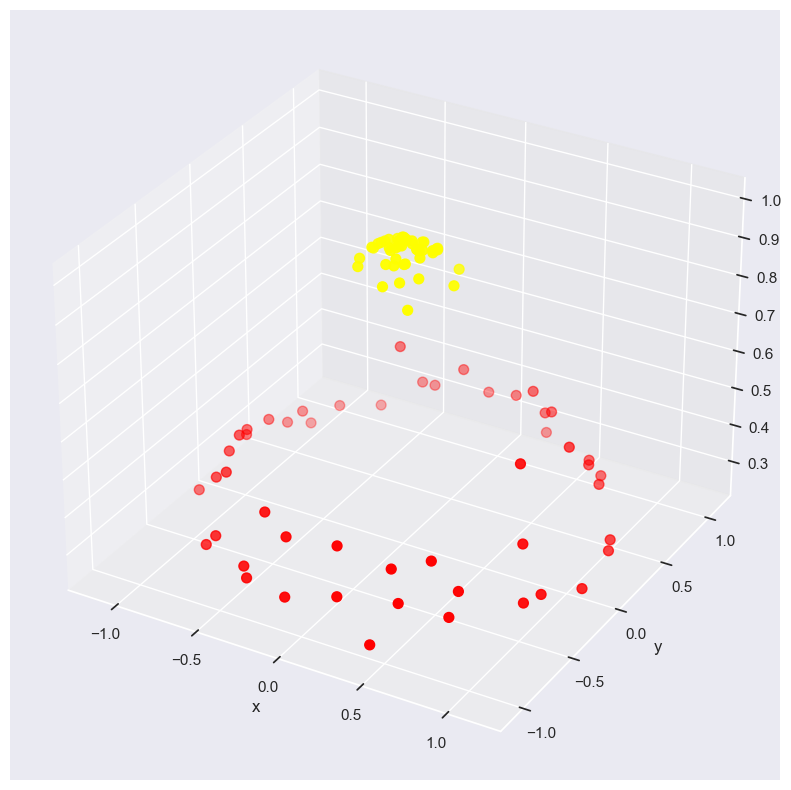

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [23]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [24]:
clf.support_vectors_


array([[-0.88284347, -0.21961747],
       [-0.32285753, -0.83144284],
       [ 0.33112172,  0.7982462 ],
       [-0.42700477,  0.67270075],
       [ 0.76961368, -0.10430598],
       [ 0.15255321, -0.89175991],
       [ 0.18483675, -0.25645454],
       [ 0.13539613,  0.3385092 ],
       [-0.23130614,  0.08829689]])

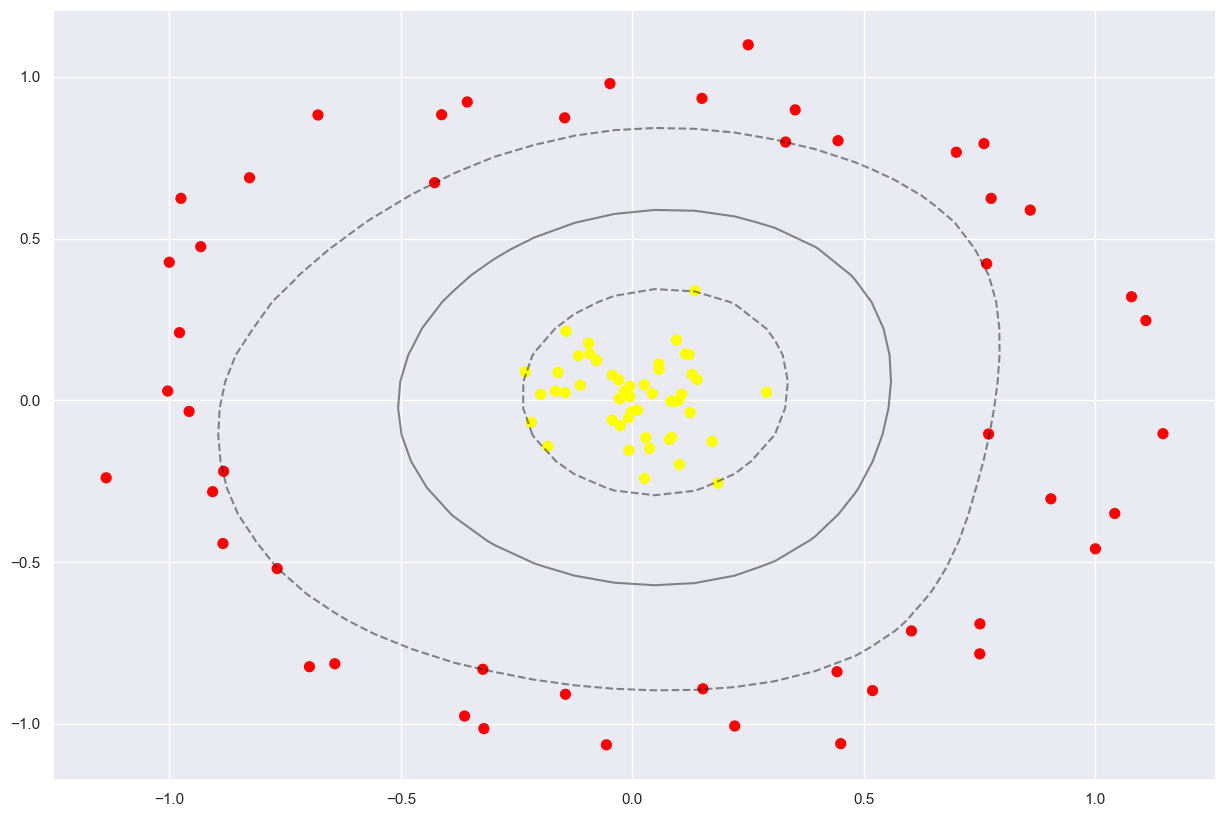

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

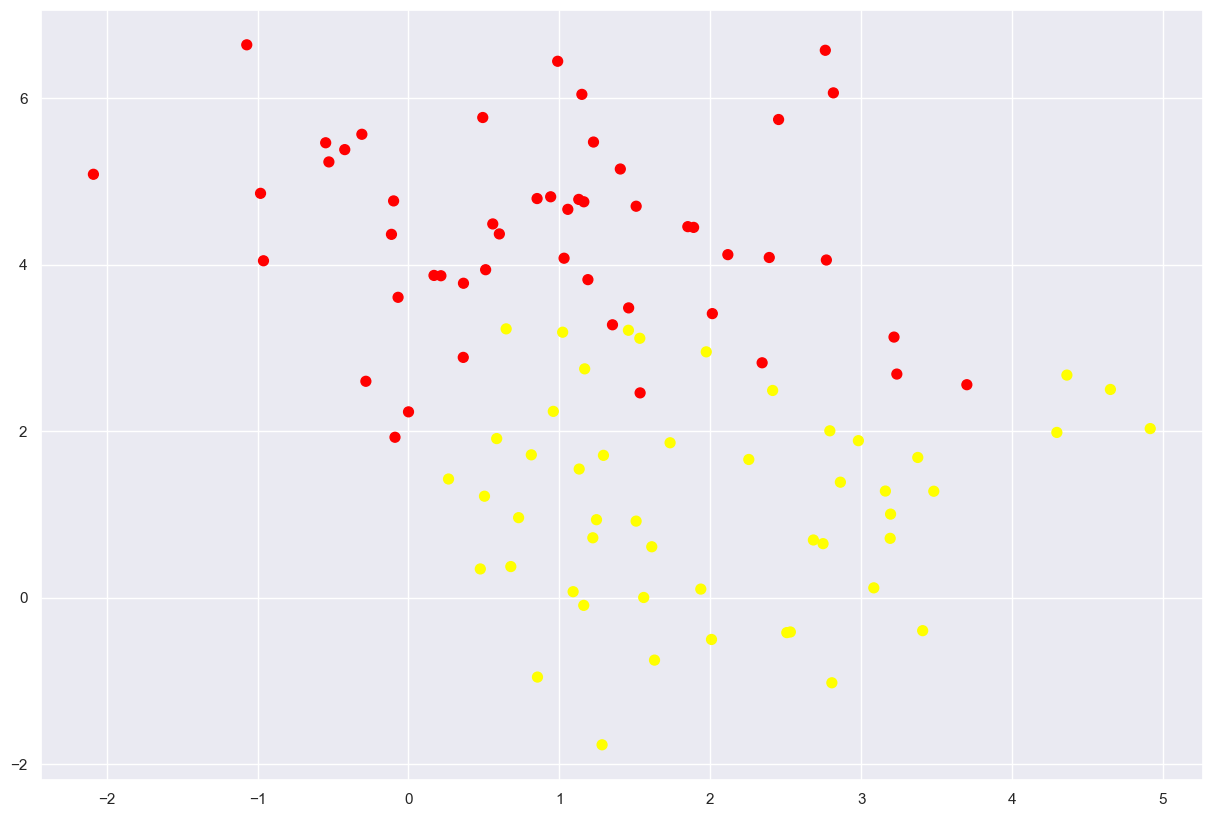

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

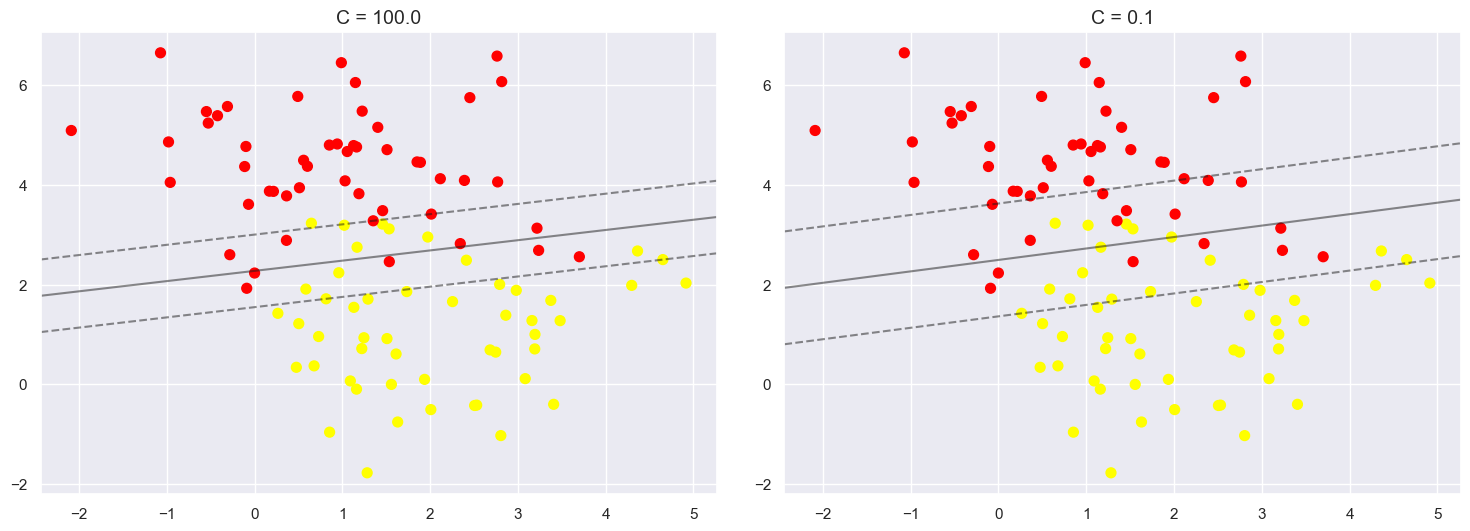

In [27]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [28]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

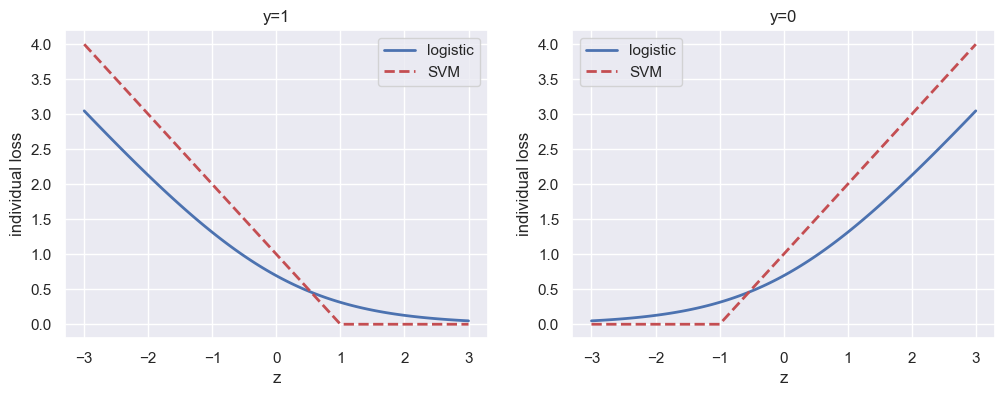

In [29]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')
ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')
ax[0].set_title('y=1')
ax[1].set_title('y=0')
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()